<a href="https://colab.research.google.com/github/adylansd28/Algorythms/blob/main/Simple-Linnear-Regression/Notebooks/homicides_year_bySex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Author:</b> Andres Dilan Salas Duran
<br>
<b>Purpose:</b> Practice the process of train and test a Simple Linear Regresion Model on dataset that gives homicides per 100,000 population by sex on each country

In [56]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

%matplotlib inline

In [57]:
#Get data
#Data set columns:
#  year (Regressor): year of measurement
#  country (Dependent Variable): Number of Homicides Per 100000 population

url ='https://raw.githubusercontent.com/adylansd28/Algorythms/main/Simple-Linnear-Regression/homicides-year-bySex.csv'
df = pd.read_csv(url)
df

,year,algeria_f,algeria_m,egypt_f,egypt_m,morocco_f,morocco_m,tunisia_f,tunisia_m,burundi_f,...,reunion_f,reunion_m,saint pierre and miquelon_f,saint pierre and miquelon_m,san marino_f,san marino_m,turks and caicos islands_f,turks and caicos islands_m,united states virgin islands_f,united states virgin islands_m
0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,3.0,20.0
1,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,2.0,26.0
2,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,5.0,36.0
3,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,3.0,28.0
4,2004,NaN,NaN,52.0,270.0,NaN,NaN,NaN,NaN,NaN,...,10.0,12.0,NaN,NaN,0.0,0.0,NaN,NaN,1.0,36.0
5,2005,NaN,NaN,63.0,459.0,NaN,NaN,NaN,NaN,NaN,...,7.0,17.0,NaN,NaN,0.0,0.0,NaN,NaN,3.0,34.0
6,2006,NaN,NaN,144.0,405.0,NaN,NaN,NaN,NaN,NaN,...,8.0,10.0,0.0,0.0,0.0,0.0,NaN,NaN,4.0,39.0
7,2007,NaN,NaN,163.0,517.0,NaN,NaN,NaN,NaN,NaN,...,8.0,16.0,NaN,NaN,0.0,0.0,1.0,1.0,3.0,40.0
8,2008,NaN,NaN,110.0,856.0,NaN,NaN,NaN,NaN,NaN,...,4.0,13.0,NaN,NaN,0.0,0.0,1.0,1.0,2.0,44.0
9,2009,NaN,NaN,193.0,719.0,52.0,379.0,NaN,NaN,NaN,...,5.0,9.0,NaN,NaN,0.0,0.0,0.0,2.0,2.0,48.0


In [119]:
# Name of the country on which the linear regresion will be performed using its homicides rate per year by sex
country = "china macao sar"
country_m = country + "_m"
country_f = country + "_f"

In [120]:
# Create a subset only for the selected country for males, and drop rows with no values
df_male = df[['year', country_m]]
df_male.dropna(how='any', inplace=True)
df_male

<ipython-input-120-75b8c5f8e303>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male.dropna(how='any', inplace=True)


,year,china macao sar_m
8,2008,1.0
9,2009,2.0
10,2010,2.0
11,2011,1.0
12,2012,3.0
13,2013,0.0
14,2014,0.0
15,2015,0.0
16,2016,1.0
18,2018,1.0


In [121]:
# Create a subset only for the selected country for females, and drop rows with no values
df_female = df[['year', country_f]]
df_female.dropna(how='any', inplace=True)
df_female

<ipython-input-121-2468d50c9069>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female.dropna(how='any', inplace=True)


,year,china macao sar_f
8,2008,3.0
9,2009,3.0
10,2010,0.0
11,2011,3.0
12,2012,1.0
13,2013,1.0
14,2014,1.0
15,2015,1.0
17,2017,2.0
18,2018,1.0


In [122]:
#Split df into regressor and dependant variable, and train set and test set - MALES
x_male = np.array(df_male['year'])
x_male = x_male.reshape(-1,1)
y_male = df_male[country_m]
x_male_train, x_male_test, y_male_train, y_male_test = train_test_split(x_male, y_male, test_size=0.2, random_state=42)

In [123]:
#Split df into regressor and dependant variable, and train set and test set - FEMALES
x_female = np.array(df_female['year'])
x_female = x_female.reshape(-1,1)
y_female = df_female[country_f]
x_female_train, x_female_test, y_female_train, y_female_test = train_test_split(x_female, y_female, test_size=0.2, random_state=42)

In [124]:
#Train the Simple Linnear Regression Model - MALES
model_male = linear_model.LinearRegression()
model_male.fit(x_male_train, y_male_train)

LinearRegression()

In [125]:
#Train the Simple Linnear Regression Model - FEMALES
model_female = linear_model.LinearRegression()
model_female.fit(x_female_train, y_female_train)

LinearRegression()

In [126]:
#Model predictions - MALES
y_male_pred = model_male.predict(x_male_test)

In [127]:
#Model predictions - FEMALES
y_female_pred = model_female.predict(x_female_test)

In [128]:
# MALES
# Obtained coeficient 'slope / m'
print('Coefficients: \n', model_male.coef_)
# Model intercept
print('Independent term: \n', model_male.intercept_)
# Mean Squared Error
print("Mean squared error: %.2f" % mean_squared_error(y_male_test, y_male_pred))
# Mean Squared Error. Best Score is 1.0
print('Variance score: %.2f' % r2_score(y_male_test, y_male_pred))

Coefficients: 
 [-0.08490566]
Independent term: 
 172.311320754717
Mean squared error: 0.87
Variance score: -2.94


In [129]:
# FEMALES
# Obtained coeficient 'slope / m'
print('Coefficients: \n', model_female.coef_)
# Model intercept
print('Independent term: \n', model_female.intercept_)
# Mean Squared Error
print("Mean squared error: %.2f" % mean_squared_error(y_female_test, y_female_pred))
# Mean Squared Error. Best Score is 1.0
print('Variance score: %.2f' % r2_score(y_female_test, y_female_pred))

Coefficients: 
 [-0.00226244]
Independent term: 
 6.11085972850673
Mean squared error: 1.58
Variance score: -0.01


In [130]:
#MALES
#Obtain the missing data to elaborate the graph
m_male = model_male.coef_
b_male = model_male.intercept_
x_male_model = np.linspace(x_male.min(), x_male.max(), 100)
y_male_model = m_male*x_male_model + b_male

In [131]:
#FEMALES
#Obtain the missing data to elaborate the graph
m_female = model_female.coef_
b_female = model_female.intercept_
x_female_model = np.linspace(x_female.min(), x_female.max(), 100)
y_female_model = m_female*x_female_model + b_female

<function matplotlib.pyplot.show(close=None, block=None)>

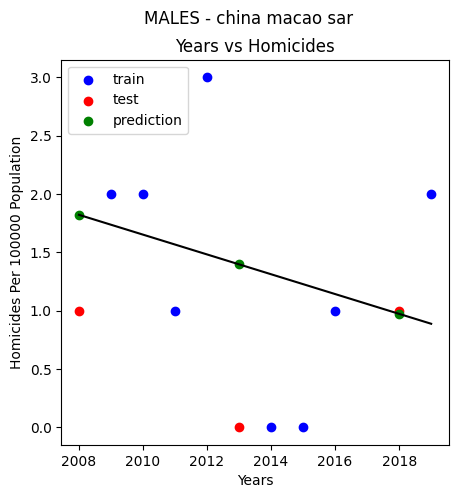

In [132]:
#MALES
#Plot adjustment
plt.figure(figsize=(5,5))
plt.title("Years vs Homicides")
plt.suptitle(f"MALES - {country}")
plt.xlabel("Years")
plt.ylabel("Homicides Per 100000 Population")
plt.scatter(x_male_train, y_male_train, color = 'blue', label = 'train')
plt.scatter(x_male_test, y_male_test, color = 'red', label = 'test')
plt.scatter(x_male_test, y_male_pred, color = 'green', label = 'prediction')
plt.plot(x_male_model, y_male_model, color="black")
plt.legend(loc="upper left")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

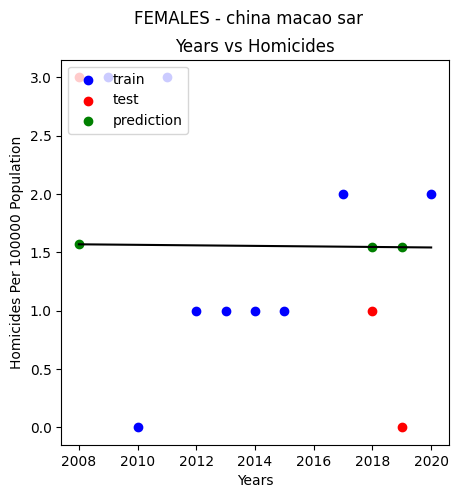

In [133]:
#FEMALES
#Plot adjustment
plt.figure(figsize=(5,5))
plt.title("Years vs Homicides")
plt.suptitle(f"FEMALES - {country}")
plt.xlabel("Years")
plt.ylabel("Homicides Per 100000 Population")
plt.scatter(x_female_train, y_female_train, color = 'blue', label = 'train')
plt.scatter(x_female_test, y_female_test, color = 'red', label = 'test')
plt.scatter(x_female_test, y_female_pred, color = 'green', label = 'prediction')
plt.plot(x_female_model, y_female_model, color="black")
plt.legend(loc="upper left")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

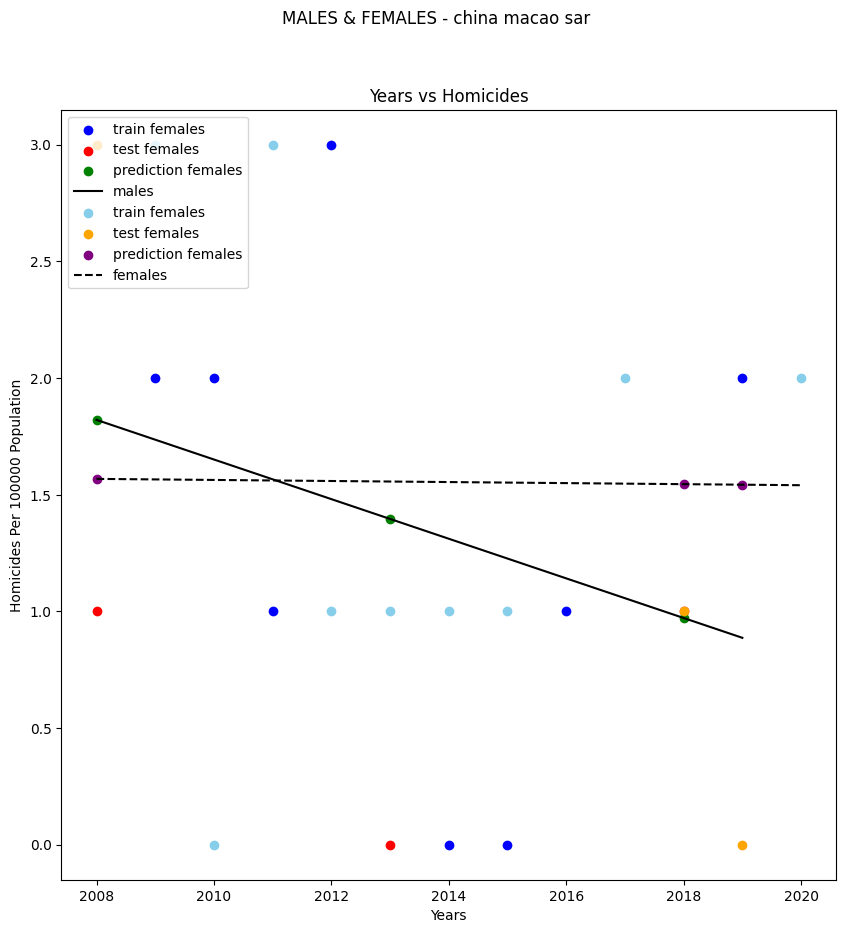

In [134]:
#MALES
#Plot adjustment
plt.figure(figsize=(10,10))
plt.title("Years vs Homicides")
plt.suptitle(f"MALES & FEMALES - {country}")
plt.xlabel("Years")
plt.ylabel("Homicides Per 100000 Population")

#MALES
plt.scatter(x_male_train, y_male_train, color = 'blue', label = 'train females')
plt.scatter(x_male_test, y_male_test, color = 'red', label = 'test females')
plt.scatter(x_male_test, y_male_pred, color = 'green', label = 'prediction females')
plt.plot(x_male_model, y_male_model, color="black", label="males")

#FEMALES
plt.scatter(x_female_train, y_female_train, color = 'skyblue', label = 'train females')
plt.scatter(x_female_test, y_female_test, color = 'orange', label = 'test females')
plt.scatter(x_female_test, y_female_pred, color = 'purple', label = 'prediction females')
plt.plot(x_female_model, y_female_model, color="black", label="females", linestyle="dashed")

plt.legend(loc="upper left")
plt.show

In [135]:
#MALES
prediction_female = np.array([[2035]])
prediction_female.reshape(-1,1)
model_female.predict(prediction_female)

array([1.50678733])

In [136]:
#FEMALES
prediction_male = np.array([[2035]])
prediction_male.reshape(-1,1)
model_male.predict(prediction_male)

array([-0.47169811])